In [1]:
%run Common.ipynb

import os.path
import pandas as pd
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.preprocessing import scale
from numpy.linalg import norm

In [2]:
c_reg = 0.01 # regularizer value for log transformation

# Get data for all 20 categories
dataset = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

In [3]:
vectorizer = TfidfVectorizer(min_df=3, stop_words = 'english')

data_tfidf = vectorizer.fit_transform(dataset.data)

print("TFIDF Shape of the dataset: %s" %str(data_tfidf.shape))

TFIDF Shape of the dataset: (18846, 52295)


In [4]:
r_list = [1, 2, 3, 5, 10, 20, 50, 80, 100, 200, 300, 500]
cols = ['r','Homogeneity Score', 'Completeness Score', 'V-Measure Score', 'Adjusted Rand Score', 'Adjusted Mutual Info Score']

<h2>SVD</h2>

In [5]:
pickle_file = "q12_svd_tfidf_500.pickle"
if os.path.isfile(pickle_file):
    data_tfidf_svd = pickle_load(pickle_file)
else:
    svd500 = TruncatedSVD(n_components=500)
    %time data_tfidf_svd = svd500.fit_transform(data_tfidf)
    #pickle_write(data_tfidf_svd, pickle_file)  # this is big, ~190 MB

Wall time: 16 s


<h3>SVD Only</h3>

In [6]:
df_svd_km100 = pd.DataFrame(columns=cols)

for i in log_progress(r_list):
    km = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=100, n_jobs=8)
    %time km.fit(data_tfidf_svd[:,:i])
    df_svd_km100 = df_svd_km100.append({cols[0]:i,
                                      cols[1]:homogeneity_score(dataset.target, km.labels_),
                                      cols[2]:completeness_score(dataset.target, km.labels_),
                                      cols[3]:v_measure_score(dataset.target, km.labels_),
                                      cols[4]:adjusted_rand_score(dataset.target, km.labels_),
                                      cols[5]:adjusted_mutual_info_score(dataset.target, km.labels_)},
                                     ignore_index=True)
df_svd_km100.set_index('r', inplace=True)

Wall time: 6.65 s
Wall time: 12.2 s
Wall time: 17 s
Wall time: 14.6 s
Wall time: 12.5 s
Wall time: 12.4 s
Wall time: 15.8 s
Wall time: 19.7 s
Wall time: 24.1 s
Wall time: 44.4 s
Wall time: 59.5 s
Wall time: 1min 33s


In [7]:
df_svd_km100

Homogeneity Score  Completeness Score  V-Measure Score  \
r                                                               
1.0             0.027762            0.030880         0.029238   
2.0             0.209917            0.223561         0.216524   
3.0             0.237339            0.247705         0.242412   
5.0             0.312423            0.329639         0.320800   
10.0            0.334660            0.374368         0.353402   
20.0            0.286465            0.380312         0.326784   
50.0            0.288057            0.413996         0.339731   
80.0            0.291962            0.438581         0.350559   
100.0           0.308206            0.430936         0.359382   
200.0           0.272579            0.395992         0.322895   
300.0           0.294436            0.487539         0.367145   
500.0           0.301645            0.447934         0.360514   

       Adjusted Rand Score  Adjusted Mutual Info Score  
r                                                       
1.0               0.005876                    0.024588  
2.0               0.064259                    0.207357  
3.0               0.081664                    0.234874  
5.0               0.124490                    0.310200  
10.0              0.134574                    0.332499  
20.0              0.092812                    0.284129  
50.0              0.084444                    0.285707  
80.0              0.076933                    0.289628  
100.0             0.090740                    0.305930  
200.0             0.083759                    0.270177  
300.0             0.075037                    0.292076  
500.0             0.084116                    0.299350

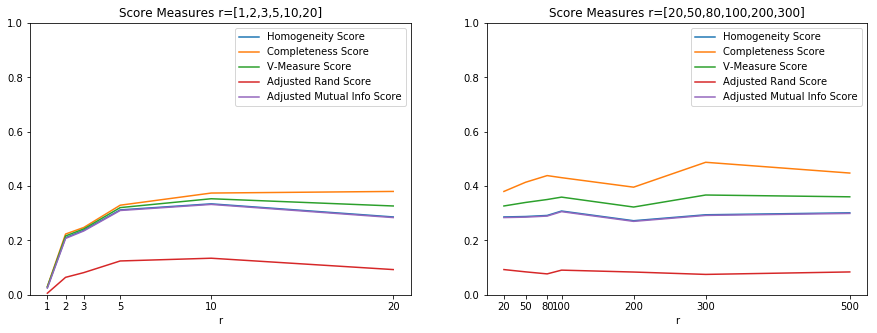

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(15)
fig.set_figheight(5)
df_svd_km100[0:20].plot(ax=axes[0], ylim=(0.0,1.0), xticks=r_list[0:6], title="Score Measures r=[1,2,3,5,10,20]")
_ = df_svd_km100[20:500].plot(ax=axes[1], ylim=(0.0,1.0), xticks=r_list[5:], title="Score Measures r=[20,50,80,100,200,300]")

<h3>SVD with Log-Transformation</h3>

In [9]:
df_svd_log_km = pd.DataFrame(columns=cols)

# log-transform
sign_mat = np.sign(data_tfidf_svd) # sign(x)
log_vec = np.log( np.abs(data_tfidf_svd) + c_reg ) - np.log(c_reg)
data_tfidf_svd_log = (sign_mat * log_vec)

for r in log_progress(r_list):
    km = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=100, n_jobs=8)
    %time km.fit(data_tfidf_svd_log[:,:r])
    df_svd_log_km = df_svd_log_km.append({cols[0]:r,
                                      cols[1]:homogeneity_score(dataset.target, km.labels_),
                                      cols[2]:completeness_score(dataset.target, km.labels_),
                                      cols[3]:v_measure_score(dataset.target, km.labels_),
                                      cols[4]:adjusted_rand_score(dataset.target, km.labels_),
                                      cols[5]:adjusted_mutual_info_score(dataset.target, km.labels_)},
                                     ignore_index=True)
df_svd_log_km.set_index('r', inplace=True)

Wall time: 7.12 s
Wall time: 12.3 s
Wall time: 13.8 s
Wall time: 12 s
Wall time: 13 s
Wall time: 11.5 s
Wall time: 17 s
Wall time: 22.2 s
Wall time: 25.3 s
Wall time: 47.4 s
Wall time: 1min 9s
Wall time: 1min 52s


In [10]:
df_svd_log_km

Homogeneity Score  Completeness Score  V-Measure Score  \
r                                                               
1.0             0.027793            0.030958         0.029290   
2.0             0.218017            0.222581         0.220275   
3.0             0.247591            0.251130         0.249348   
5.0             0.328662            0.333660         0.331142   
10.0            0.395313            0.401805         0.398533   
20.0            0.363084            0.403455         0.382207   
50.0            0.415941            0.437225         0.426318   
80.0            0.382127            0.407839         0.394564   
100.0           0.444006            0.479663         0.461146   
200.0           0.460680            0.519945         0.488522   
300.0           0.399854            0.451012         0.423896   
500.0           0.411231            0.477296         0.441807   

       Adjusted Rand Score  Adjusted Mutual Info Score  
r                                                       
1.0               0.005761                    0.024612  
2.0               0.073515                    0.215491  
3.0               0.092195                    0.245162  
5.0               0.141370                    0.326495  
10.0              0.225305                    0.393362  
20.0              0.194917                    0.361021  
50.0              0.227279                    0.414054  
80.0              0.200943                    0.380130  
100.0             0.228915                    0.442208  
200.0             0.235301                    0.458931  
300.0             0.200331                    0.397906  
500.0             0.205642                    0.409308

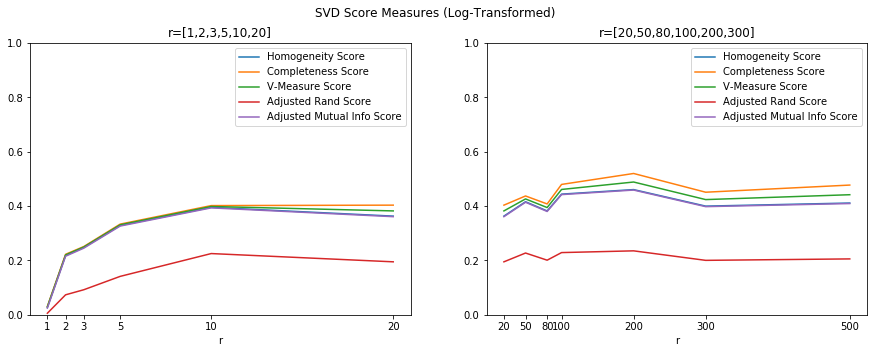

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(15)
fig.set_figheight(5)
fig.suptitle('SVD Score Measures (Log-Transformed)')
df_svd_log_km[0:20].plot(ax=axes[0], ylim=(0.0,1.0), xticks=r_list[0:6], title="r=[1,2,3,5,10,20]")
_ = df_svd_log_km[20:500].plot(ax=axes[1], ylim=(0.0,1.0), xticks=r_list[5:], title="r=[20,50,80,100,200,300]")

<h3>SVD with Scaling and Log-Transformation</h3>

In [12]:
df_svd_scale_log_km = pd.DataFrame(columns=cols)

# scale to unit variance
data_tfidf_svd_scaled = scale(data_tfidf_svd, axis=0, with_mean=False, with_std=True)

# then log-transform
sign_mat = np.sign(data_tfidf_svd_scaled) # sign(x)
log_vec = np.log( np.abs(data_tfidf_svd_scaled) + c_reg ) - np.log(c_reg)
data_tfidf_svd_scaled_log = (sign_mat * log_vec)

for r in log_progress(r_list):
    km = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=100, n_jobs=8)
    %time km.fit(data_tfidf_svd_scaled_log[:,:r])
    df_svd_scale_log_km = df_svd_scale_log_km.append({cols[0]:r,
                                      cols[1]:homogeneity_score(dataset.target, km.labels_),
                                      cols[2]:completeness_score(dataset.target, km.labels_),
                                      cols[3]:v_measure_score(dataset.target, km.labels_),
                                      cols[4]:adjusted_rand_score(dataset.target, km.labels_),
                                      cols[5]:adjusted_mutual_info_score(dataset.target, km.labels_)},
                                     ignore_index=True)
df_svd_scale_log_km.set_index('r', inplace=True)

Wall time: 6.73 s
Wall time: 7.97 s
Wall time: 8.72 s
Wall time: 5.74 s
Wall time: 9.05 s
Wall time: 11.2 s
Wall time: 16.5 s
Wall time: 24.5 s
Wall time: 30.9 s
Wall time: 56.5 s
Wall time: 1min 23s
Wall time: 2min 19s


In [13]:
df_svd_scale_log_km

Homogeneity Score  Completeness Score  V-Measure Score  \
r                                                               
1.0             0.027771            0.030975         0.029286   
2.0             0.209885            0.222033         0.215788   
3.0             0.229448            0.237456         0.233383   
5.0             0.318085            0.327633         0.322788   
10.0            0.375074            0.378353         0.376706   
20.0            0.365971            0.383877         0.374711   
50.0            0.354094            0.367104         0.360481   
80.0            0.466928            0.485533         0.476049   
100.0           0.393289            0.416004         0.404328   
200.0           0.407115            0.436111         0.421115   
300.0           0.385906            0.446556         0.414022   
500.0           0.332397            0.367947         0.349270   

       Adjusted Rand Score  Adjusted Mutual Info Score  
r                                                       
1.0               0.005730                    0.024594  
2.0               0.078062                    0.207329  
3.0               0.088141                    0.226959  
5.0               0.136972                    0.315882  
10.0              0.215367                    0.373057  
20.0              0.211016                    0.363922  
50.0              0.193841                    0.352008  
80.0              0.282456                    0.465207  
100.0             0.221960                    0.391329  
200.0             0.207809                    0.405199  
300.0             0.164943                    0.383909  
500.0             0.156556                    0.330236

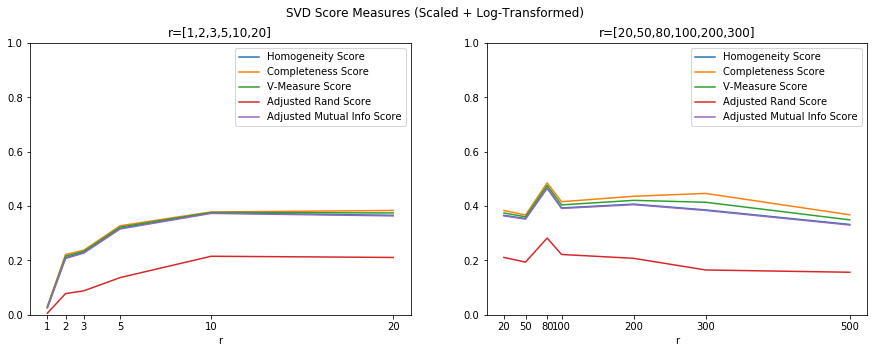

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(15)
fig.set_figheight(5)
fig.suptitle('SVD Score Measures (Scaled + Log-Transformed)')
df_svd_scale_log_km[0:20].plot(ax=axes[0], ylim=(0.0,1.0), xticks=r_list[0:6], title="r=[1,2,3,5,10,20]")
_ = df_svd_scale_log_km[20:500].plot(ax=axes[1], ylim=(0.0,1.0), xticks=r_list[5:], title="r=[20,50,80,100,200,300]")

<p>SVD best: log-transformation with 200 dimensions.</p>
<p>Scaling doesn't work well with the higher number of clusters.</p>

<h2>NMF</h2>

In [15]:
nmf_r_list = [1, 2, 3, 5, 10, 15, 20, 50, 80, 100, 300, 500]

nmf_fits = {}

for r in log_progress(nmf_r_list):
    pickle_file = "q12_nmf_%d.pickle" %r
    if os.path.isfile(pickle_file):
        nmf_fits[r] = pickle_load(pickle_file)
    else:
        nmf_fits[r] = NMF(n_components=r)
        %time nmf_fits[r].fit(data_tfidf)
        pickle_write(nmf_fits[r], pickle_file)


Wall time: 549 ms
Wall time: 2.35 s
Wall time: 4 s
Wall time: 4.4 s
Wall time: 7.07 s
Wall time: 17.6 s
Wall time: 15.6 s
Wall time: 36.8 s
Wall time: 51.1 s
Wall time: 2min 43s
Wall time: 22min 35s
Wall time: 1h 2min 28s


<h3>NMF Only</h3>

In [16]:
df_nmf_km100 = pd.DataFrame(columns=cols)

for r, nmf in log_progress(nmf_fits.items()):
    data_tfidf_nmf = nmf.transform(data_tfidf)
    km = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=100, n_jobs=8)
    %time km.fit(data_tfidf_nmf)
    df_nmf_km100 = df_nmf_km100.append({cols[0]:r,
                                      cols[1]:homogeneity_score(dataset.target, km.labels_),
                                      cols[2]:completeness_score(dataset.target, km.labels_),
                                      cols[3]:v_measure_score(dataset.target, km.labels_),
                                      cols[4]:adjusted_rand_score(dataset.target, km.labels_),
                                      cols[5]:adjusted_mutual_info_score(dataset.target, km.labels_)},
                                     ignore_index=True)
df_nmf_km100.set_index('r', inplace=True)

Wall time: 6.67 s
Wall time: 10.2 s
Wall time: 11.5 s
Wall time: 11.4 s
Wall time: 8.93 s
Wall time: 8.41 s
Wall time: 7.35 s
Wall time: 10.8 s
Wall time: 14.5 s
Wall time: 15.2 s
Wall time: 36.5 s
Wall time: 58.5 s


In [17]:
df_nmf_km100.sort_index(axis=0, inplace=True)
df_nmf_km100

Homogeneity Score  Completeness Score  V-Measure Score  \
r                                                               
1.0             0.027762            0.030880         0.029238   
2.0             0.169189            0.179839         0.174352   
3.0             0.191617            0.209013         0.199937   
5.0             0.292172            0.309749         0.300704   
10.0            0.316442            0.356710         0.335371   
15.0            0.298838            0.363656         0.328076   
20.0            0.275685            0.369652         0.315828   
50.0            0.192659            0.386026         0.257036   
80.0            0.087212            0.230682         0.126572   
100.0           0.103861            0.254318         0.147489   
300.0           0.074345            0.212438         0.110144   
500.0           0.108598            0.177896         0.134866   

       Adjusted Rand Score  Adjusted Mutual Info Score  
r                                                       
1.0               0.005876                    0.024588  
2.0               0.050897                    0.166480  
3.0               0.057421                    0.188993  
5.0               0.104929                    0.289881  
10.0              0.123831                    0.314220  
15.0              0.110163                    0.296545  
20.0              0.083957                    0.273313  
50.0              0.030317                    0.189965  
80.0              0.011492                    0.084114  
100.0             0.012892                    0.100838  
300.0             0.003273                    0.071161  
500.0             0.012014                    0.105621

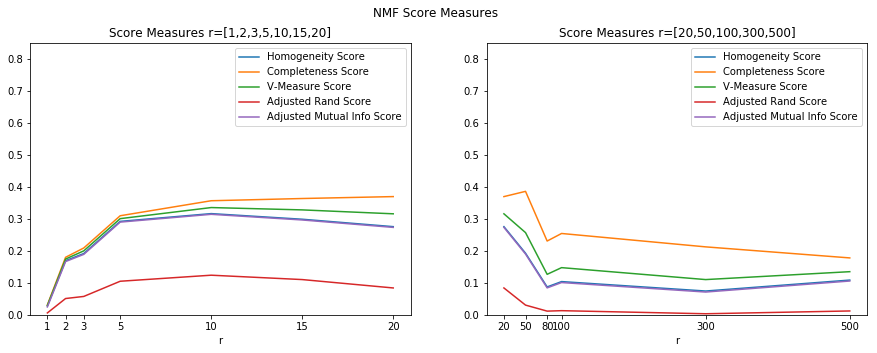

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(15)
fig.set_figheight(5)
fig.suptitle('NMF Score Measures')
df_nmf_km100[0:20].plot(ax=axes[0], ylim=(0.0,.85), xticks=nmf_r_list[0:7], title="Score Measures r=[1,2,3,5,10,15,20]")
_ = df_nmf_km100[20:500].plot(ax=axes[1], ylim=(0.0,.85), xticks=nmf_r_list[6:], title="Score Measures r=[20,50,100,300,500]")

<h3>NMF with Log-Transformation and Scaling</h3>

In [19]:
df_nmf_log_scale = pd.DataFrame(columns=cols)

for r, nmf in log_progress(nmf_fits.items()):
    data_tfidf_nmf = nmf.transform(data_tfidf)    
    # log-transform
    sign_mat = np.sign(data_tfidf_nmf) # sign(x)
    log_vec = np.log( np.abs(data_tfidf_nmf) + c_reg ) - np.log(c_reg)
    data_tfidf_nmf_log = (sign_mat * log_vec)
    # then scale
    data_tfidf_nmf_log_scaled = scale(data_tfidf_nmf_log, axis=0, with_mean=False, with_std=True)
    km = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=100, n_jobs=8)
    %time km.fit(data_tfidf_nmf_log_scaled)
    df_nmf_log_scale = df_nmf_log_scale.append({cols[0]:r,
                                      cols[1]:homogeneity_score(dataset.target, km.labels_),
                                      cols[2]:completeness_score(dataset.target, km.labels_),
                                      cols[3]:v_measure_score(dataset.target, km.labels_),
                                      cols[4]:adjusted_rand_score(dataset.target, km.labels_),
                                      cols[5]:adjusted_mutual_info_score(dataset.target, km.labels_)},
                                     ignore_index=True)
df_nmf_log_scale.set_index('r', inplace=True)

Wall time: 6.78 s
Wall time: 11.2 s
Wall time: 12 s
Wall time: 11.6 s
Wall time: 10.1 s
Wall time: 9.58 s
Wall time: 8.63 s
Wall time: 13.5 s
Wall time: 17.5 s
Wall time: 22.1 s
Wall time: 53.2 s
Wall time: 1min 25s


In [20]:
df_nmf_log_scale.sort_index(axis=0, inplace=True)
df_nmf_log_scale

Homogeneity Score  Completeness Score  V-Measure Score  \
r                                                               
1.0             0.027961            0.030264         0.029067   
2.0             0.178541            0.183024         0.180755   
3.0             0.204037            0.209690         0.206825   
5.0             0.310502            0.313716         0.312101   
10.0            0.371361            0.381628         0.376425   
15.0            0.361722            0.387054         0.373959   
20.0            0.352464            0.391521         0.370968   
50.0            0.454683            0.541219         0.494191   
80.0            0.427230            0.538825         0.476582   
100.0           0.501090            0.585194         0.539886   
300.0           0.478854            0.589092         0.528283   
500.0           0.518704            0.610195         0.560742   

       Adjusted Rand Score  Adjusted Mutual Info Score  
r                                                       
1.0               0.005672                    0.024777  
2.0               0.055882                    0.175888  
3.0               0.070209                    0.201467  
5.0               0.125192                    0.308277  
10.0              0.187777                    0.369328  
15.0              0.214217                    0.359653  
20.0              0.193443                    0.350368  
50.0              0.230508                    0.452912  
80.0              0.210753                    0.425358  
100.0             0.240989                    0.499469  
300.0             0.205670                    0.477144  
500.0             0.240739                    0.517132

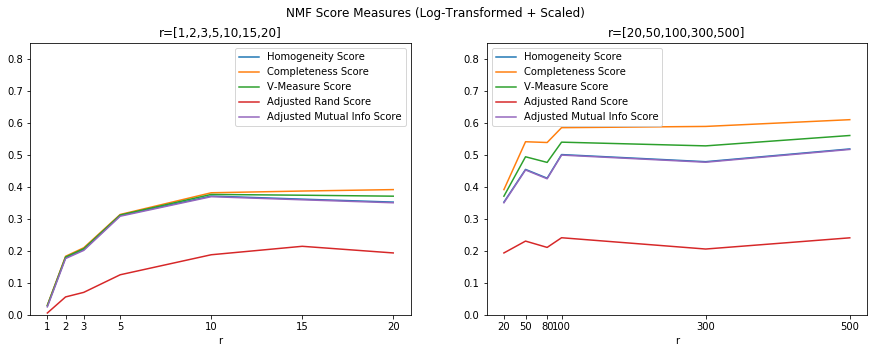

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(15)
fig.set_figheight(5)
fig.suptitle('NMF Score Measures (Log-Transformed + Scaled)')
df_nmf_log_scale[0:20].plot(ax=axes[0], ylim=(0.0,.85), xticks=nmf_r_list[0:7], title="r=[1,2,3,5,10,15,20]")
_ = df_nmf_log_scale[20:500].plot(ax=axes[1], ylim=(0.0,.85), xticks=nmf_r_list[6:], title="r=[20,50,100,300,500]")

<p>NMF best: log-transformation and scaling with as many dimensions as you can afford to use.</p>